Asilbek. Support vector machine. Human activity recognition data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
#load dataset
df = pd.read_csv('test.csv')

In [3]:
#assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
#string labels to integers
le = LabelEncoder()
y_num = le.fit_transform(y) 

In [5]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size=0.20, random_state=42, stratify=y_num)

In [6]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [7]:
#training SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [8]:
#make predictions
y_pred = svm_model.predict(X_test_scaled)

In [9]:
#evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [10]:
#reducing to 2‑D with PCA for plotting 
pca = PCA(n_components=2, random_state=42)
X_train_2D = pca.fit_transform(X_train_scaled)
X_test_2D  = pca.transform(X_test_scaled)

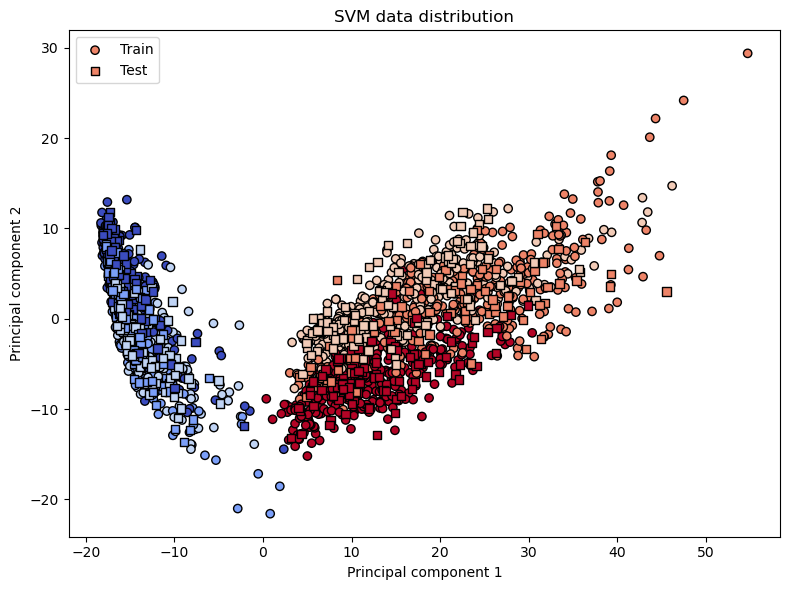

In [23]:
#plotting 
plt.figure(figsize=(8, 6))
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train,cmap='coolwarm', marker='o', edgecolors='k', label='Train')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test,cmap='coolwarm', marker='s', edgecolors='k', label='Test')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('SVM data distribution')
plt.legend()
plt.tight_layout()
plt.show()
